In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
path = Path('train')
fls = get_image_files(path)

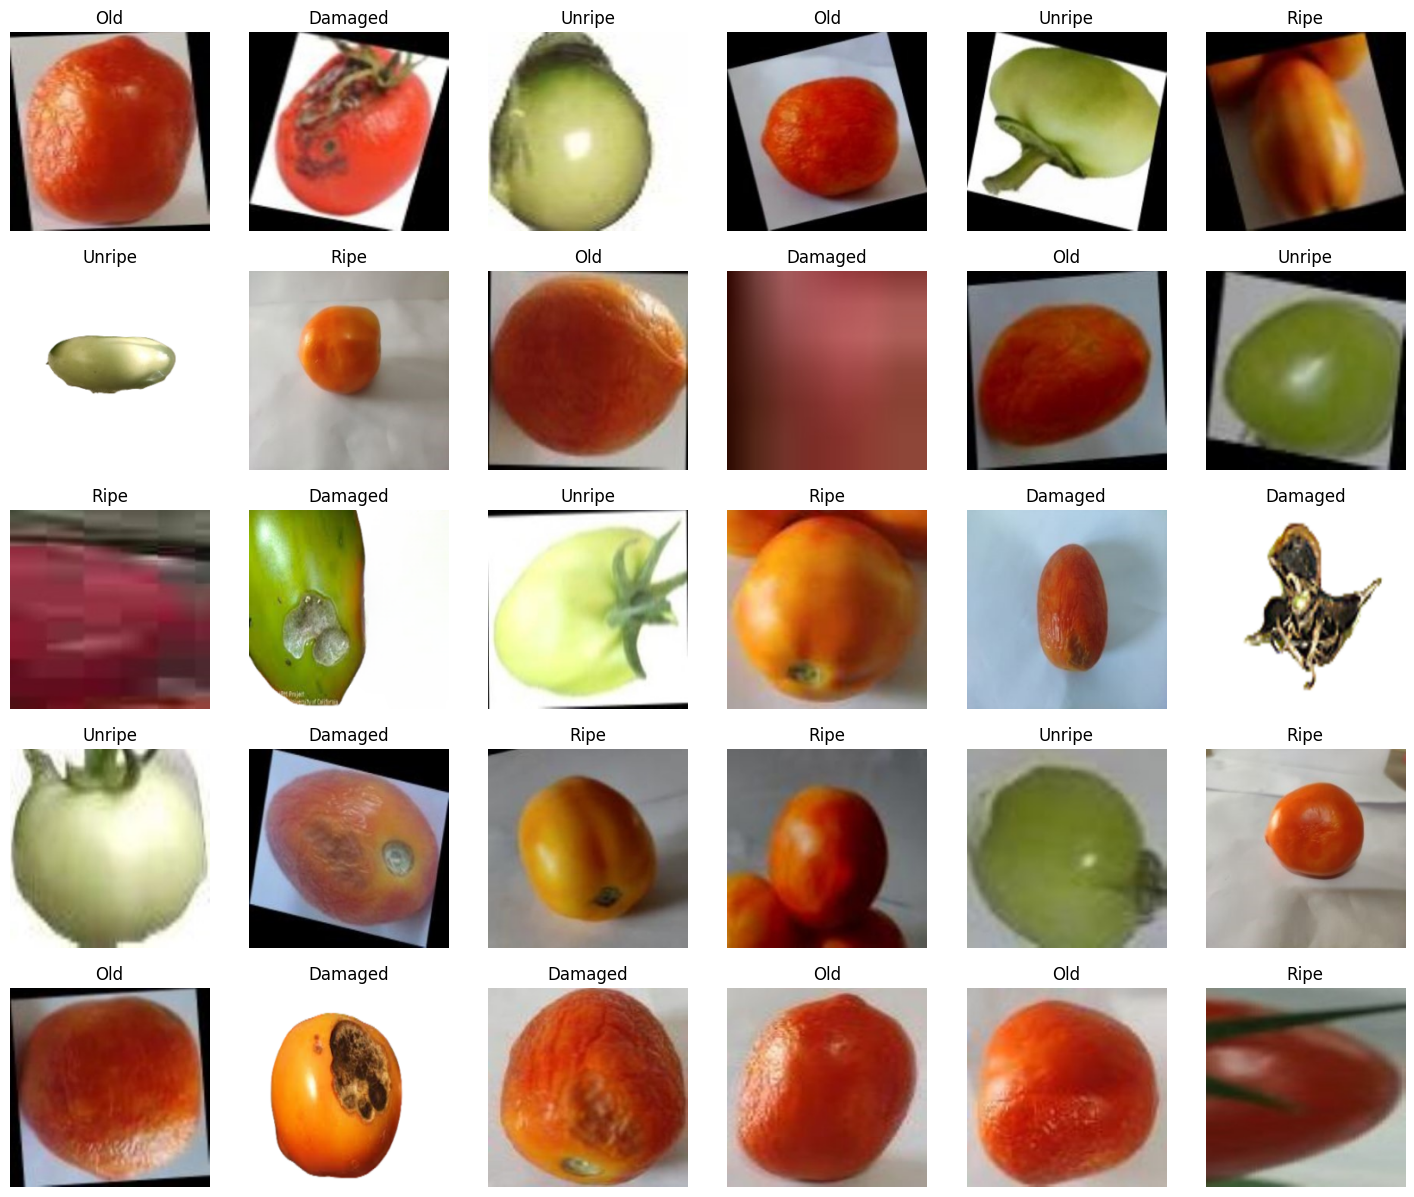

In [3]:
#data block
flowers = DataBlock(
  blocks = (ImageBlock,CategoryBlock),
  get_items = get_image_files,
  splitter = RandomSplitter(valid_pct=0.2,seed=12),
  get_y = parent_label,
  item_tfms = Resize(224,224)
)

# dataloader
dls = flowers.dataloaders(path)

#show any img with label
dls.train.show_batch(max_n = 30, nrows = 5)

In [4]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.767643,0.274191,0.910714,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.245607,0.147926,0.953571,01:08
1,0.145954,0.152973,0.964286,01:10
2,0.085678,0.142306,0.972619,01:12
3,0.045401,0.129783,0.966667,01:12
4,0.020893,0.113869,0.971429,01:13


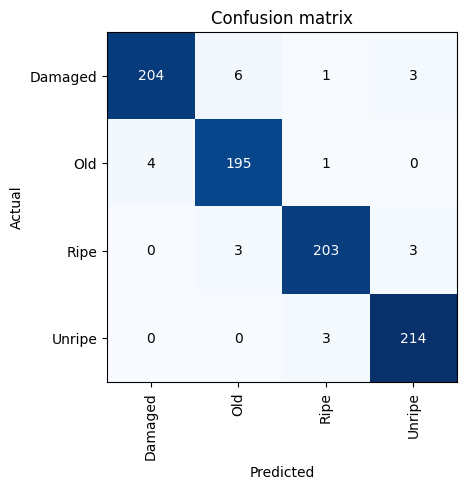

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

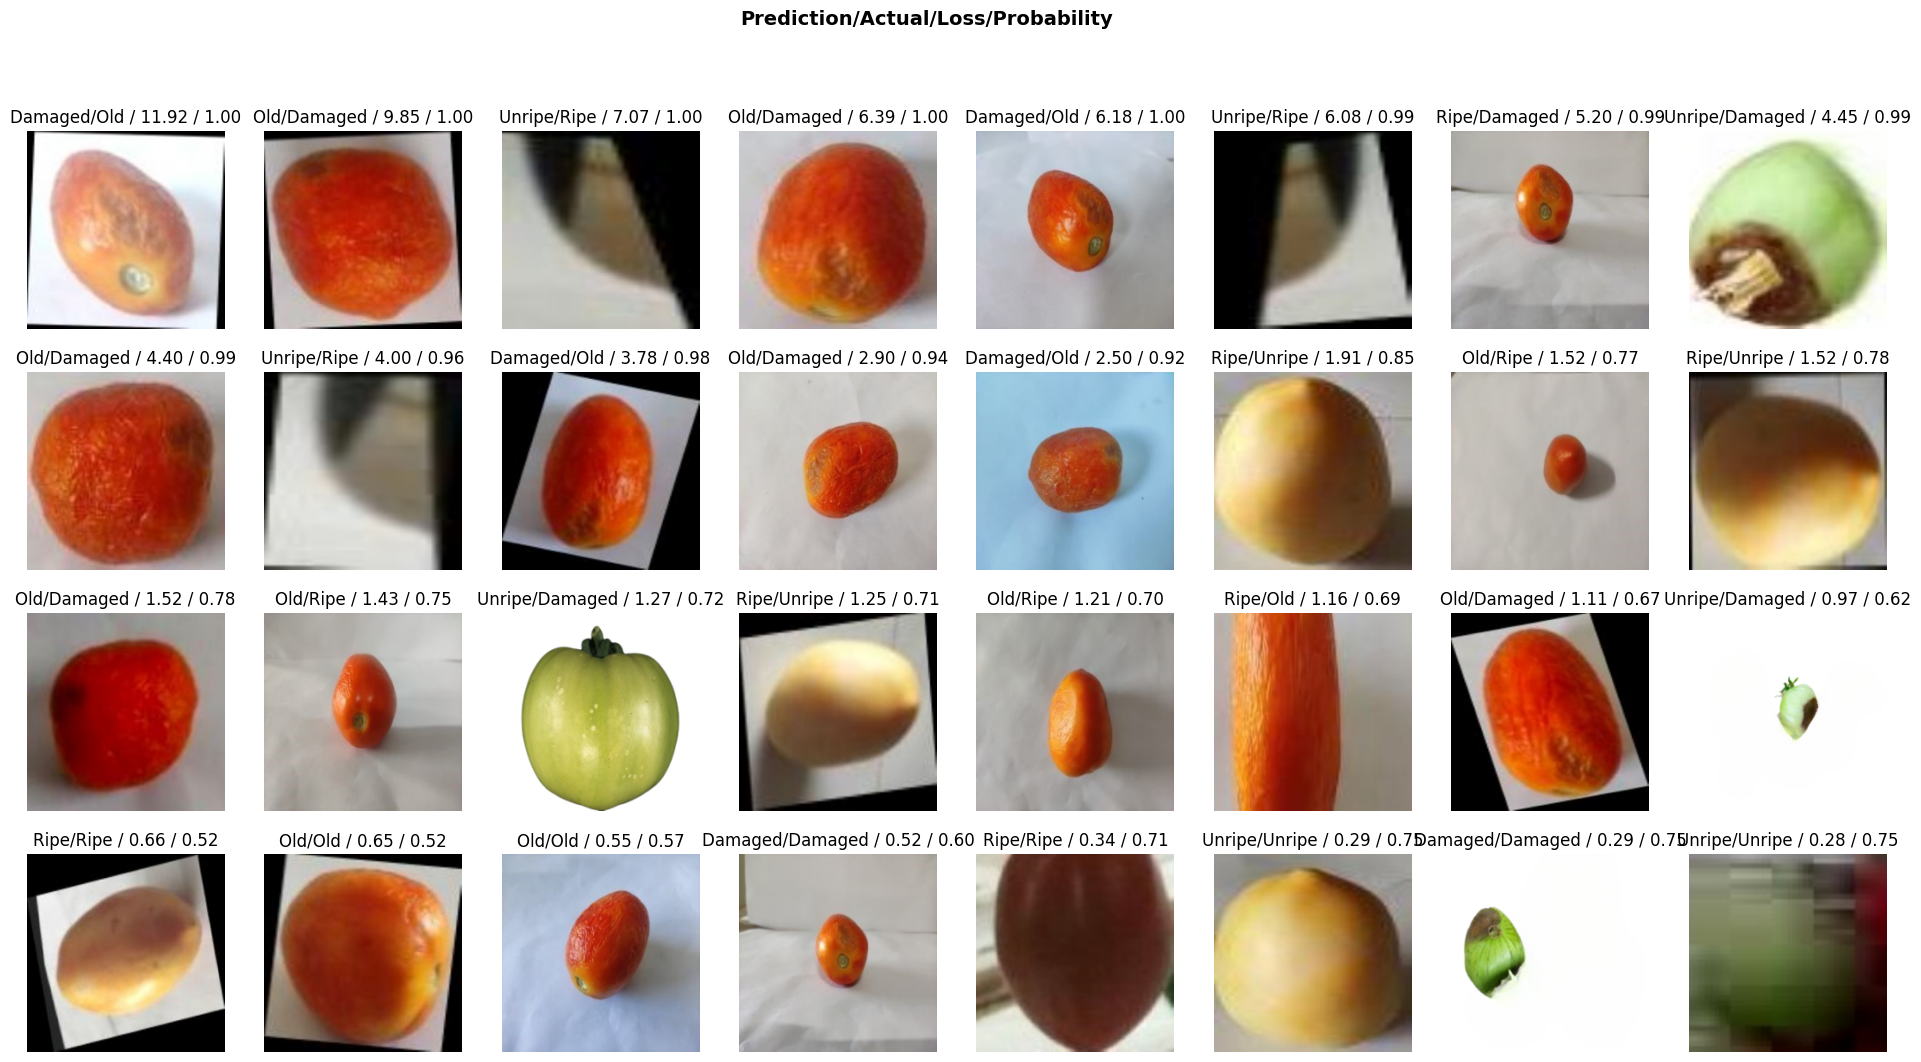

In [6]:
interp.plot_top_losses(32,nrows=4)

In [11]:
learn.export(fname='tomato.pkl')

In [1]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

In [2]:
file = widgets.FileUpload()
file

FileUpload(value=(), description='Upload')

In [6]:
import matplotlib.pyplot as plt

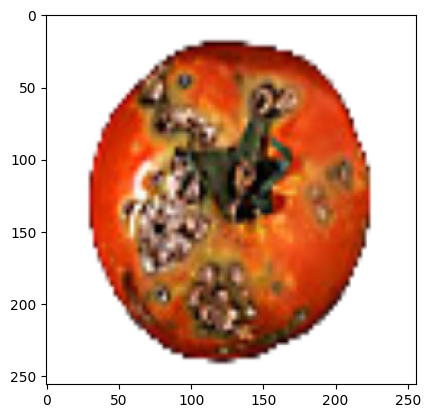

In [14]:
a = plt.imread('train/Damaged/d (1).png')
plt.imshow(a)
plt.show()

In [19]:
from PIL import Image

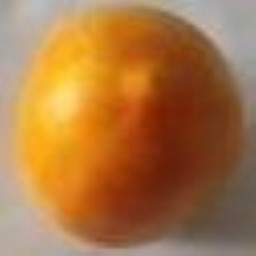

In [20]:
img = Image.open('train/Ripe/r (1012).jpg')
img

The predicte is Ripe
Confidence: 100.0


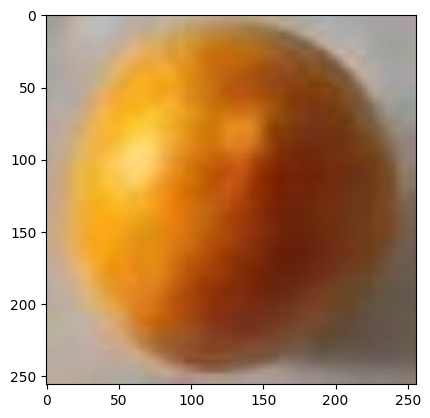

In [34]:
plt.imshow(img)
import numpy as np
img = np.array(img)
pred, pred_id, probs = model.predict(img)
print(f"The predicte is {pred}")
print(f"Confidence: {100.0 * probs[pred_id].item():.1f}")